In [1]:
#import of subprograms

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from __plt__2 import *

In [2]:
#inputting database
path = r'E:/databases/Merged.csv'
usecols = ['ager_percentile50', 'T_C_ISM_percentile50', 'T_C_ISM_percentile84', 'T_C_ISM_percentile16', 'T_W_BC_percentile50', 'T_W_BC_percentile84', 'T_W_BC_percentile16', 'P100_flux', 'P100_fluxerr', 'BPT', 'WHAN', 'Z_1', 'SFR_0_1Gyr_percentile50', 'SFR_0_1Gyr_percentile84', 'SFR_0_1Gyr_percentile16', 'mass_stellar_percentile50', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag']
MainDataFrame = pd.read_csv(path, usecols=usecols)

In [3]:
#bids setting
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]

In [4]:
# MainDataFrame.replace('""', -999.0, inplace=True)
# MainDataFrame['SurfaceDensity'] = pd.to_numeric(MainDataFrame['SurfaceDensity'])
# MainDataFrame['SurfaceDensityErr'] = pd.to_numeric(MainDataFrame['SurfaceDensityErr'])
# MainDataFrame['SurfaceDensityFlag'] = pd.to_numeric(MainDataFrame['SurfaceDensityFlag'])
# MainDataFrame.to_csv('main.csv')

# db = MainDataFrame

# db = db[db['SurfaceDensity'] > 0]
# db = db[db['SurfaceDensityErr'] > 0]
# db = db[db['SurfaceDensity'] > 2*db['SurfaceDensityErr']]
# db['SurfaceDensity'] = np.log10(db['SurfaceDensity'])
# UP = np.log10(db['SurfaceDensity'] + db['SurfaceDensityErr'])
# print(UP)
# db['SurfaceDensityUp'] = UP
# DOWN = np.log10(db['SurfaceDensity'] - db['SurfaceDensityErr'])
# db['SurfaceDensityDown'] = DOWN

# print(db['SurfaceDensity'])
# print(db['SurfaceDensityUp'])
# print(db['SurfaceDensityDown'])

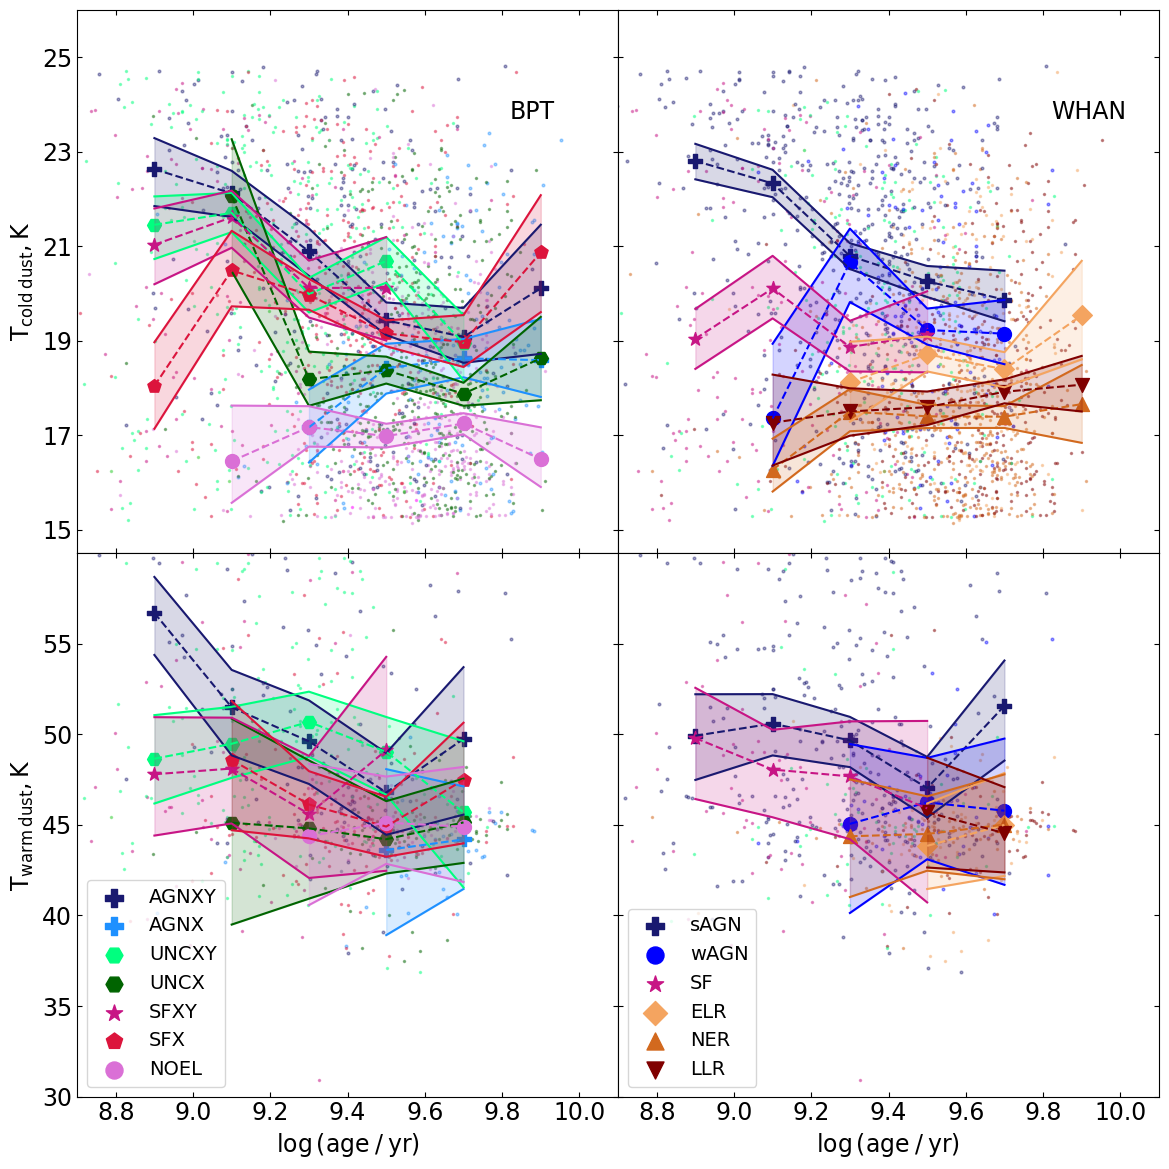

In [5]:
db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(2, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)

#creating basic plotting pars
pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : False,
    'ylabel' : r'$\mathrm{T_{cold \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['P100_flux'] > 2*db['P100_fluxerr']]
db2 = db2[db2['P100_flux'] > 0]
db2.reset_index(inplace=True, drop=True)

pars_dict_2 = {
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 60],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 60, 5),
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'ylabel' : r'$\mathrm{T_{warm \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)

#additional plotting stuff
fig.savefig('TDC.pdf')
#displaying and saving the figure 

(372, 19)
(892, 19)
(730, 19)


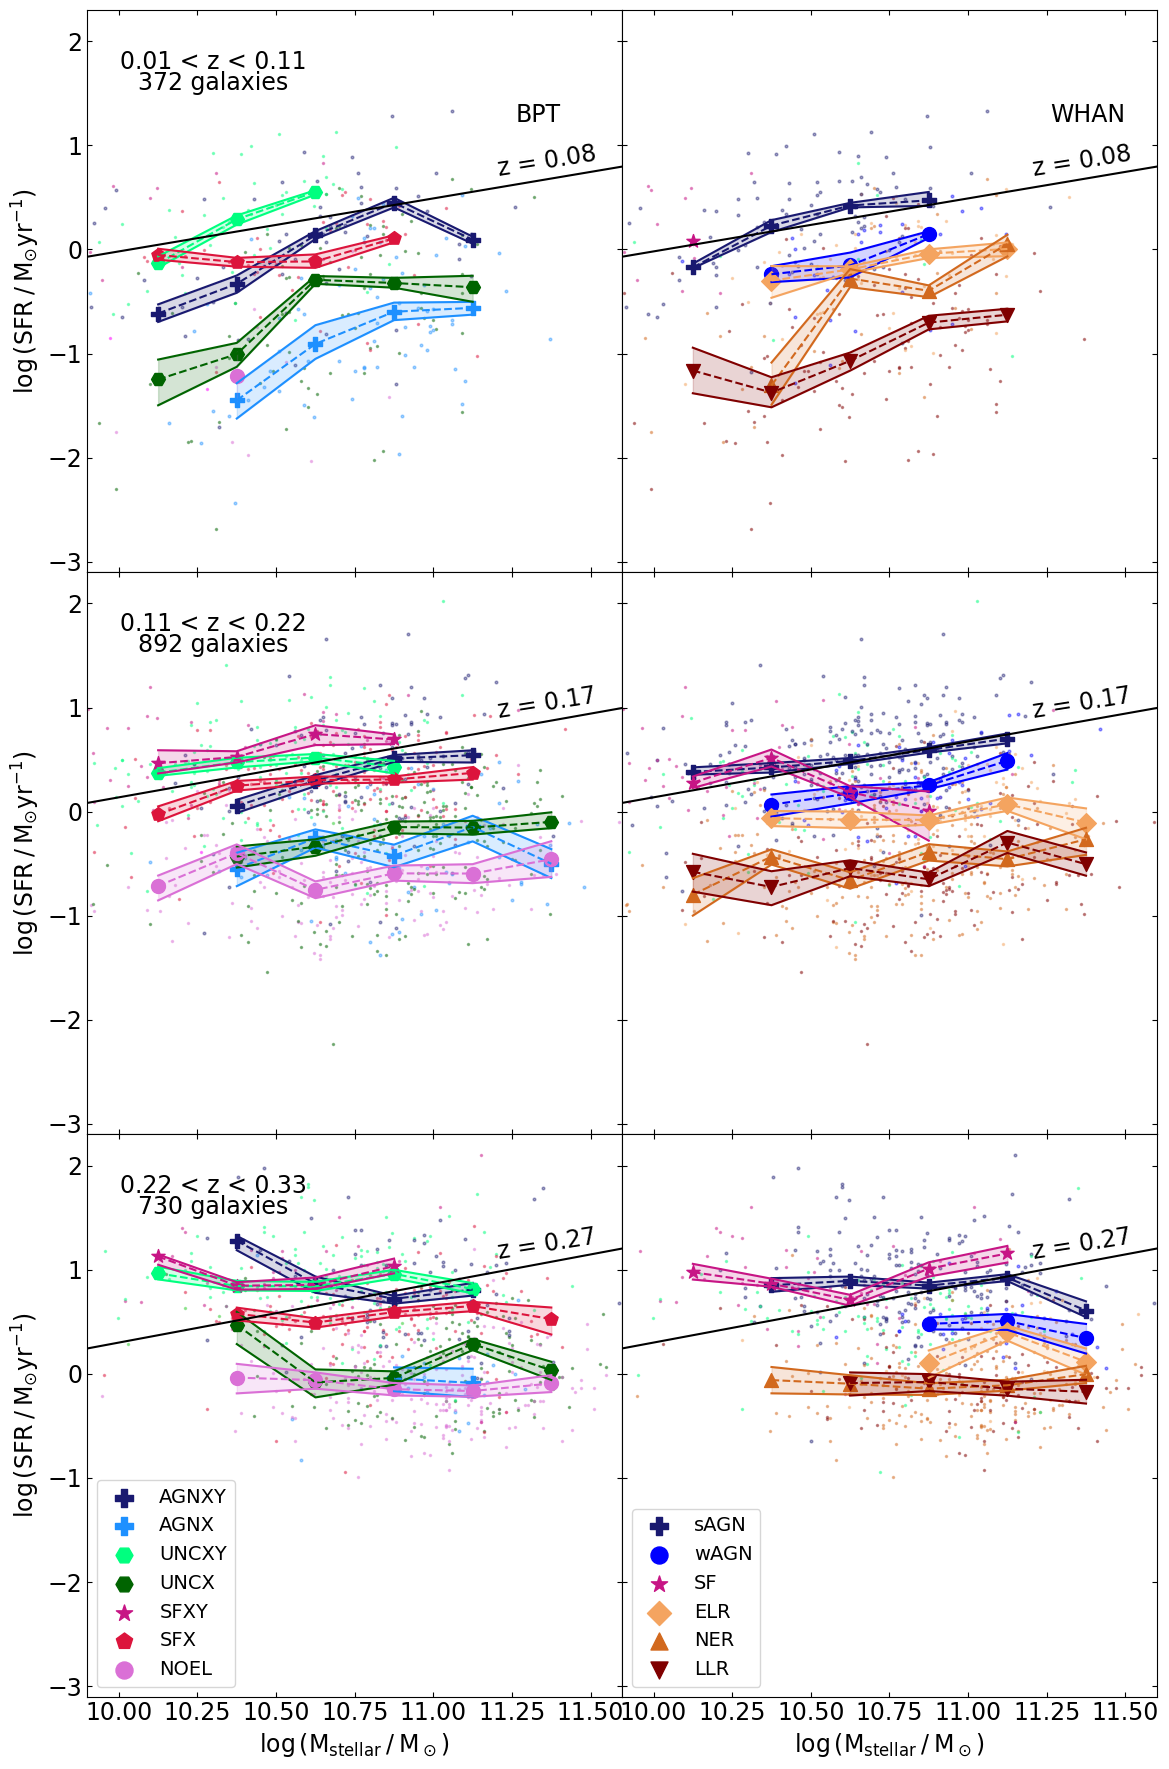

In [6]:
#applying some conditions for db
from astropy.cosmology import WMAP9 as cosmo

db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(3, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 18), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)
ax5 = fig.add_subplot(gs_top[2,0])
ax6 = fig.add_subplot(gs_top[2,1], sharey=ax5)

#creating basic plotting pars

db1 = db[db['Z_1'] < 0.11]
db1 = db1[db1['Z_1'] > 0.01]
db1.reset_index(inplace=True, drop=True)
median1 = np.median(db1['Z_1'])
print(db1.shape)

pars_dict_1 ={
    'db' : db1,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['Z_1'] < 0.22]
db2 = db2[db2['Z_1'] > 0.11]
db2.reset_index(inplace=True, drop=True)
median2 = np.median(db2['Z_1'])
print(db2.shape)

pars_dict_2 ={
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : False
}

db3 = db[db['Z_1'] < 0.33]
db3 = db3[db3['Z_1'] > 0.22]
db3.reset_index(inplace=True, drop=True)
median3 = np.median(db3['Z_1'])
print(db3.shape)

pars_dict_3 ={
    'db' : db3,
    'ax1' : ax5,
    'ax2' : ax6,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)
ax5, ax6 = plotting(pars_dict_3)

x = np.arange(6.9, 12, 0.1)
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax1.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)
ax1.text(10.3, 1.8, '0.01 < z < 0.11', ha='center', va='center')
ax1.text(10.3, 1.6, '372 galaxies', ha='center', va='center')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax2.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)

ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax3.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)
ax3.text(10.3, 1.8, '0.11 < z < 0.22', ha='center', va='center')
ax3.text(10.3, 1.6, '892 galaxies', ha='center', va='center')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax4.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)

ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax5.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)
ax5.text(10.3, 1.8, '0.22 < z < 0.33', ha='center', va='center')
ax5.text(10.3, 1.6, '730 galaxies', ha='center', va='center')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax6.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)


#additional plotting stuff
fig.savefig('SFRSM.pdf')
#displaying and saving the figure 

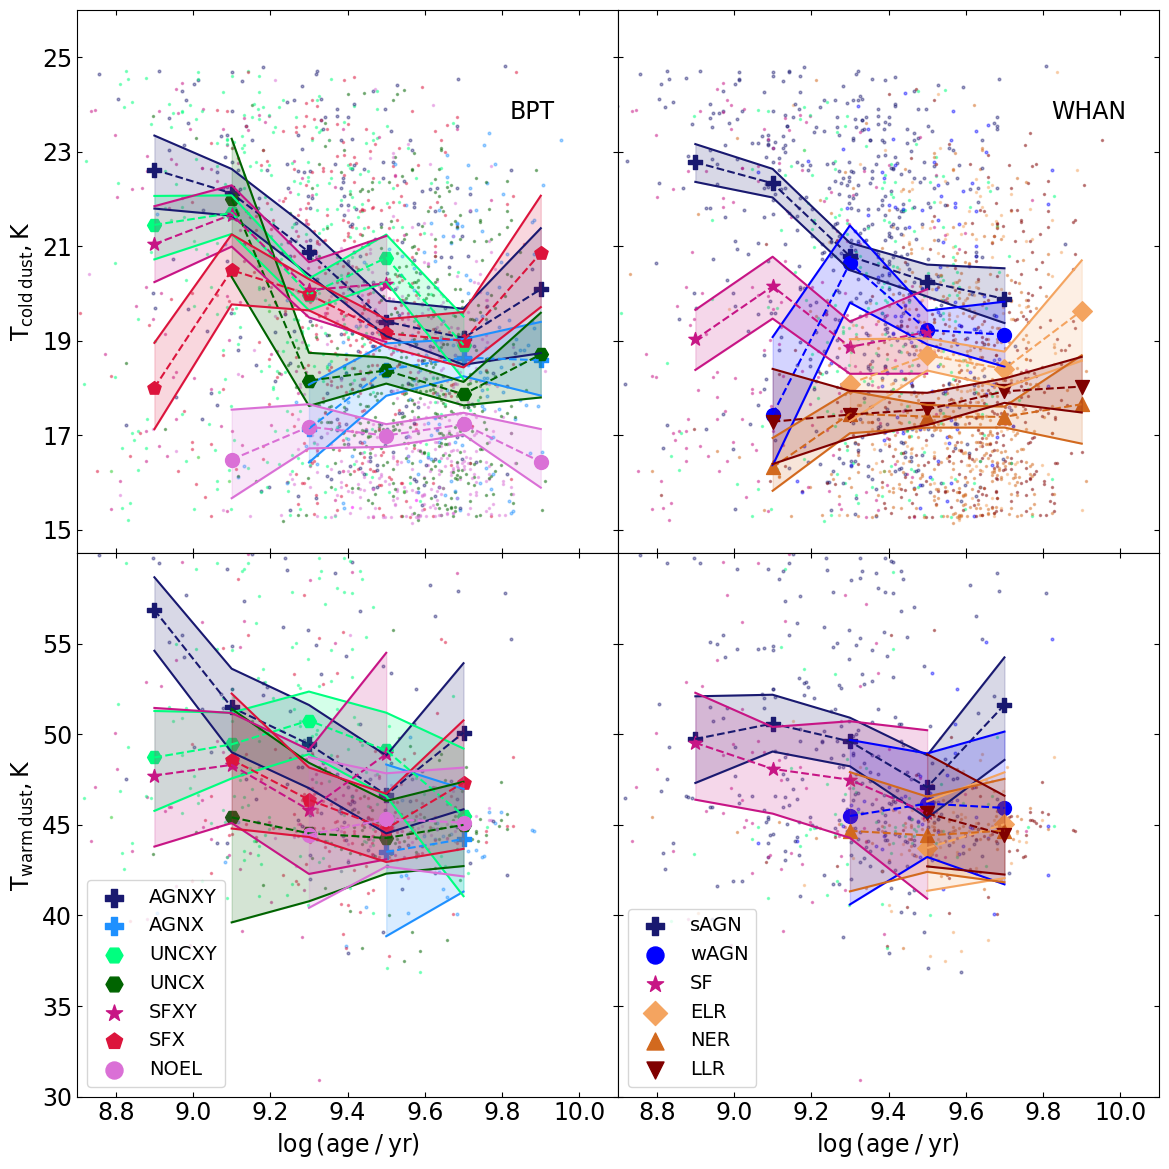

In [7]:
#applying some conditions for db
db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(2, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)

#creating basic plotting pars
pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : False,
    'ylabel' : r'$\mathrm{T_{cold \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['P100_flux'] > 2*db['P100_fluxerr']]
db2 = db2[db2['P100_flux'] > 0]
db2.reset_index(inplace=True, drop=True)

pars_dict_2 = {
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 60],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 60, 5),
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'ylabel' : r'$\mathrm{T_{warm \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)

#additional plotting stuff
fig.savefig('TDC.pdf')
#displaying and saving the figure 